## Project Structure

1. Import Essential Libraries

2. Define the Ridge Regression from Scratch

3. Define Kernel Ridge Regression from Scratch

4. Load Dataset-1 and Pre-Process the data

5. Perform Hyper Parameter Tuning of Ridge Regression

6. Perform Hyper Parameter Tuning of Kernel Ridge Regression

7. Comparisions with Sklearn Model

8. Comparisions with Other Models with Custom built Models

9. Load Dataset-2 and Perform all steps from 4 to 9

## Import Essential Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
class RidgeRegression:
    def __init__(self, learning_rate: float = 0.01, reg_strength: float = 0.01, max_iter: int = 1000):
        """Sets hyperparameters: learning_rate, reg_strength, max_iter."""
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.max_iter = max_iter
        self.weights = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Fits model using gradient descent with ridge regularization."""
        X = self._add_intercept(X)
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.max_iter):
            self.weights -= self.learning_rate * self._compute_gradient(X, y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Returns predicted values for feature matrix X."""
        X = self._add_intercept(X)
        return X.dot(self.weights)

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Adds intercept term to feature matrix X."""
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def _compute_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Computes gradient for ridge regression."""
        predictions = X.dot(self.weights)
        errors = predictions - y
        reg_term = self.reg_strength * np.hstack([0, self.weights[1:]])
        return (2 / X.shape[0]) * (X.T.dot(errors) + reg_term)

## Kernel Ridge Regression

In [3]:
class KernelRidgeRegression:
    # Constructor to initialize kernel type, regularization parameter, gamma, and polynomial degree
    def __init__(self, kernel: str = 'linear', C: float = 1.0, gamma: float = 1.0, degree: int = 3):
        self.kernel = kernel  # Type of kernel used (linear, polynomial, rbf, quadratic)
        self.C = C            # Regularization parameter
        self.gamma = gamma    # Parameter for the RBF kernel
        self.degree = degree  # Degree for the polynomial kernel
        self.alphas = None    # Coefficients for the regression

    # Fit the model to training data using the kernel matrix and regularization
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        K = self._compute_kernel_matrix(X, X)  # Compute kernel matrix for training data
        self.alphas = np.linalg.solve(K + self.C * np.eye(K.shape[0]), y)  # Solve for alpha coefficients

    # Predict output for test data based on trained alphas and kernel matrix
    def predict(self, X_train: np.ndarray, X_test: np.ndarray) -> np.ndarray:
        K = self._compute_kernel_matrix(X_test, X_train)  # Compute kernel matrix for test data
        return K.dot(self.alphas)  # Multiply kernel matrix by alphas for predictions

    # Compute kernel matrix based on selected kernel type
    def _compute_kernel_matrix(self, X1: np.ndarray, X2: np.ndarray) -> np.ndarray:
        if self.kernel == 'linear':
            return X1.dot(X2.T)  # Linear kernel
        elif self.kernel == 'polynomial':
            return (X1.dot(X2.T) + 1) ** self.degree  # Polynomial kernel with given degree
        elif self.kernel == 'rbf':
            sq_dists = np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2)
            return np.exp(-self.gamma * sq_dists)  # Radial basis function kernel
        elif self.kernel == 'quadratic':
            return (X1.dot(X2.T) + 1) ** 2  # Quadratic kernel


## Dataset 1 : salary_data.csv

In [6]:
# Loading the dataset
salary_data = pd.read_csv("salary_data.csv")

# Extracting features and target
X = salary_data[["YearsExperience"]].values
y = salary_data["Salary"].values

# Splitting the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Checking the shape of the training and testing data
#X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test_scaled.shape


In [7]:
# Hyperparameter combinations for Ridge Regression
learning_rates = [0.0001, 0.001, 0.01,0.1,1]
reg_strengths = [0.001,0.01, 0.1, 1]
max_iters = [100, 500, 1000]

# Table to store the results
ridge_results = []

# Training and evaluating Ridge Regression with different hyperparameter combinations
for lr in learning_rates:
    for reg in reg_strengths:
        for max_iter in max_iters:
            model = RidgeRegression(learning_rate=lr, reg_strength=reg, max_iter=max_iter)
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            mse = mean_squared_error(y_test, y_pred)
            ridge_results.append((lr, reg, max_iter, mse))


In [8]:
# Creating a DataFrame to display the results
ridge_results_df = pd.DataFrame(ridge_results, columns=['Learning Rate', 'Regularization Strength', 'Max Iterations', 'MSE'])
ridge_results_df

,Learning Rate,Regularization Strength,Max Iterations,MSE
0,0.0001,0.001,100,7.150323e+09
1,0.0001,0.001,500,6.133682e+09
2,0.0001,0.001,1000,5.068071e+09
3,0.0001,0.010,100,7.150323e+09
4,0.0001,0.010,500,6.133685e+09
5,0.0001,0.010,1000,5.068081e+09
6,0.0001,0.100,100,7.150325e+09
7,0.0001,0.100,500,6.133716e+09
8,0.0001,0.100,1000,5.068185e+09
9,0.0001,1.000,100,7.150338e+09


In [9]:
# Hyperparameter combinations for Kernel Ridge Regression
kernel_types = ['linear', 'polynomial', 'rbf', 'quadratic']
Cs = [0.1, 1, 10]
gammas = [0.1, 1, 5]
degrees = [2, 3]  # Only relevant for polynomial kernel

# Table to store the results
kernel_ridge_results = []

# Training and evaluating Kernel Ridge Regression with different hyperparameter combinations
for kernel in kernel_types:
    for C in Cs:
        for gamma in gammas:
            for degree in degrees:
                model = KernelRidgeRegression(kernel=kernel, C=C, gamma=gamma, degree=degree if kernel == 'polynomial' else 3)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_train_scaled, X_test_scaled)
                mse = mean_squared_error(y_test, y_pred)
                kernel_ridge_results.append((kernel, C, gamma, degree if kernel == 'polynomial' else '-', mse))


In [10]:
 kernel_ridge_results

[('linear', 0.1, 0.1, '-', 6012700315.702018),
 ('linear', 0.1, 0.1, '-', 6012700315.702018),
 ('linear', 0.1, 1, '-', 6012700315.702018),
 ('linear', 0.1, 1, '-', 6012700315.702018),
 ('linear', 0.1, 5, '-', 6012700315.702018),
 ('linear', 0.1, 5, '-', 6012700315.702018),
 ('linear', 1, 0.1, '-', 6046010224.399712),
 ('linear', 1, 0.1, '-', 6046010224.399712),
 ('linear', 1, 1, '-', 6046010224.399712),
 ('linear', 1, 1, '-', 6046010224.399712),
 ('linear', 1, 5, '-', 6046010224.399712),
 ('linear', 1, 5, '-', 6046010224.399712),
 ('linear', 10, 0.1, '-', 6320077254.652729),
 ('linear', 10, 0.1, '-', 6320077254.652729),
 ('linear', 10, 1, '-', 6320077254.652729),
 ('linear', 10, 1, '-', 6320077254.652729),
 ('linear', 10, 5, '-', 6320077254.652729),
 ('linear', 10, 5, '-', 6320077254.652729),
 ('polynomial', 0.1, 0.1, 2, 56594695.29564049),
 ('polynomial', 0.1, 0.1, 3, 52962895.52867368),
 ('polynomial', 0.1, 1, 2, 56594695.29564049),
 ('polynomial', 0.1, 1, 3, 52962895.52867368),
 ('p

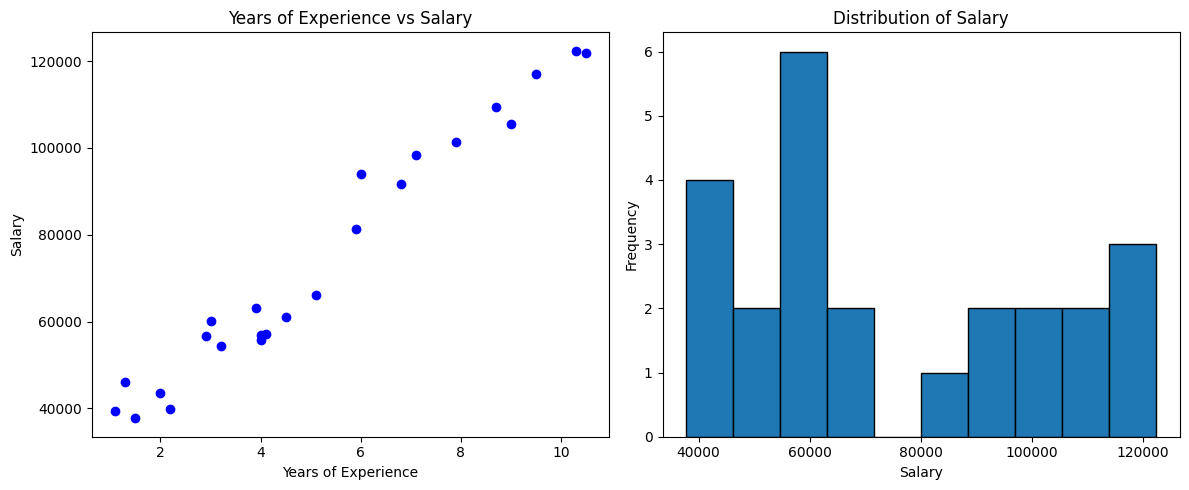

In [ ]:
# Plotting the distribution of the feature (YearsExperience) and target variable (Salary)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of YearsExperience
axes[0].scatter(X_train, y_train, c='blue')
axes[0].set_title('Years of Experience vs Salary')
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Salary')

# Plotting the distribution of Salary
axes[1].hist(y_train, bins=10, edgecolor='black')
axes[1].set_title('Distribution of Salary')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
# Scaling the feature (YearsExperience)
feature_scaler = StandardScaler()
X_train_scaled_full = feature_scaler.fit_transform(X_train)
X_test_scaled_full = feature_scaler.transform(X_test)

# Scaling the target variable (Salary)
target_scaler = StandardScaler()
y_train_scaled_full = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled_full = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Checking the shape of the scaled data
X_train_scaled_full.shape, y_train_scaled_full.shape, X_test_scaled_full.shape, y_test_scaled_full.shape


((24, 1), (24,), (6, 1), (6,))

In [12]:
# Table to store the results for Ridge Regression with fully scaled data
ridge_results_scaled = []
learning_rates  = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000, 2000, 5000]

# Training and evaluating Ridge Regression with different hyperparameter combinations
for lr in learning_rates:
    for reg in reg_strengths:
        for max_iter in max_iters:
            model = RidgeRegression(learning_rate=lr, reg_strength=reg, max_iter=max_iter)
            model.fit(X_train_scaled_full, y_train_scaled_full)
            y_pred = model.predict(X_test_scaled_full)
            mse = mean_squared_error(y_test_scaled_full, y_pred)
            ridge_results_scaled.append((lr, reg, max_iter, mse))


In [14]:
# Creating a DataFrame to display the results
ridge_results_scaled_df = pd.DataFrame(ridge_results_scaled, columns=['Learning Rate', 'Regularization Strength', 'Max Iterations', 'MSE'])
ridge_results_scaled_df
ridge_results_scaled_df.to_csv('ridge_results_scaled_df.csv')

In [18]:
ridge_results_scaled_df

,Learning Rate,Regularization Strength,Max Iterations,MSE
0,0.000001,0.001,100,0.773469
1,0.000001,0.001,500,0.772365
2,0.000001,0.001,1000,0.770986
3,0.000001,0.001,2000,0.768237
4,0.000001,0.001,5000,0.760056
...,...,...,...,...
175,0.100000,100.000,100,0.531405
176,0.100000,100.000,500,0.531405
177,0.100000,100.000,1000,0.531405
178,0.100000,100.000,2000,0.531405


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ridge_results_scaled_df, *['Learning Rate'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ridge_results_scaled_df, *['Regularization Strength'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ridge_results_scaled_df, *['Max Iterations'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ridge_results_scaled_df, *['MSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ridge_results_scaled_df, *['Learning Rate'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ridge_results_scaled_df, *['Regularization Strength'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ridge_results_scaled_df, *['Max Iterations'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ridge_results_scaled_df, *['MSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(ridge_results_scaled_df, *[[['Learning Rate', 'Regularization Strength'], ['Regularization Strength', 'Max Iterations'], ['Max Iterations', 'MSE']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(ridge_results_scaled_df, *['Learning Rate', 'Regularization Strength', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(ridge_results_scaled_df, *['Learning Rate', 'Max Iterations', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(ridge_results_scaled_df, *['Learning Rate', 'MSE', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(ridge_results_scaled_df, *['Learning Rate', 'count()', None], **{})
chart

In [15]:
# Table to store the results for Kernel Ridge Regression with fully scaled data
kernel_ridge_results_scaled = []

# Training and evaluating Kernel Ridge Regression with different hyperparameter combinations
for kernel in kernel_types:
    for C in Cs:
        for gamma in gammas:
            for degree in degrees:
                model = KernelRidgeRegression(kernel=kernel, C=C, gamma=gamma, degree=degree if kernel == 'polynomial' else 3)
                model.fit(X_train_scaled_full, y_train_scaled_full)
                y_pred = model.predict(X_train_scaled_full, X_test_scaled_full)
                mse = mean_squared_error(y_test_scaled_full, y_pred)
                kernel_ridge_results_scaled.append((kernel, C, gamma, degree if kernel == 'polynomial' else '-', mse))

# Creating a DataFrame to display the results
kernel_ridge_results_scaled_df = pd.DataFrame(kernel_ridge_results_scaled, columns=['Kernel Type', 'C', 'Gamma', 'Degree', 'MSE'])
kernel_ridge_results_scaled_df

,Kernel Type,C,Gamma,Degree,MSE
0,linear,0.1,0.1,-,0.065351
1,linear,0.1,0.1,-,0.065351
2,linear,0.1,1.0,-,0.065351
3,linear,0.1,1.0,-,0.065351
4,linear,0.1,5.0,-,0.065351
...,...,...,...,...,...
67,quadratic,10.0,0.1,-,0.089815
68,quadratic,10.0,1.0,-,0.089815
69,quadratic,10.0,1.0,-,0.089815
70,quadratic,10.0,5.0,-,0.089815


In [16]:
kernel_ridge_results_scaled_df.to_csv('kernel_ridge_results_scaled_df.csv')

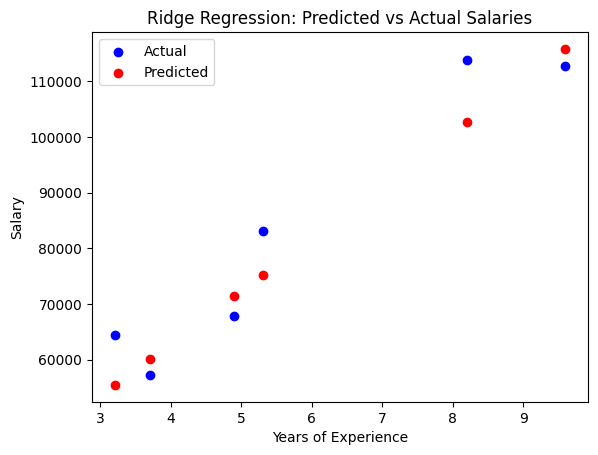

49841186.31808108

In [ ]:
# Selecting the best hyperparameters for Ridge Regression
best_ridge_params = ridge_results_scaled_df.loc[ridge_results_scaled_df['MSE'].idxmin()][['Learning Rate', 'Regularization Strength', 'Max Iterations']]

# Retraining Ridge Regression with the best hyperparameters
ridge_model_best = RidgeRegression(learning_rate=best_ridge_params['Learning Rate'],
                                   reg_strength=best_ridge_params['Regularization Strength'],
                                   max_iter=int(best_ridge_params['Max Iterations']))
ridge_model_best.fit(X_train_scaled_full, y_train_scaled_full)

# Making predictions and inverting the scaling
y_pred_ridge_scaled = ridge_model_best.predict(X_test_scaled_full)
y_pred_ridge_original = target_scaler.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1)).flatten()

# Calculating the MSE on the original scale
mse_ridge_original = mean_squared_error(y_test, y_pred_ridge_original)

# Plotting the predicted vs actual values
plt.scatter(X_test, y_test, c='blue', label='Actual')
plt.scatter(X_test, y_pred_ridge_original, c='red', label='Predicted')
plt.title('Ridge Regression: Predicted vs Actual Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

mse_ridge_original


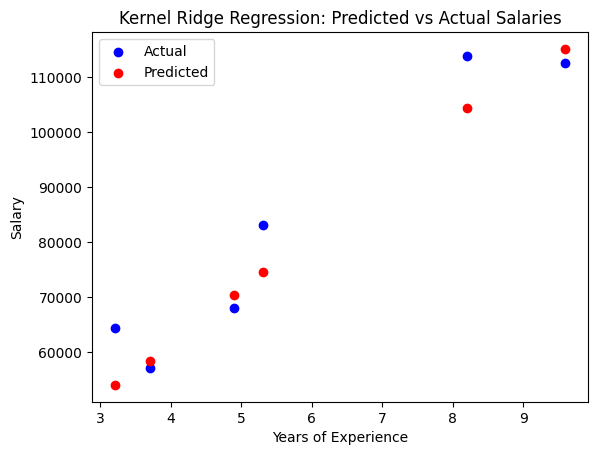

47115699.827080935

In [ ]:
# Selecting the best hyperparameters for Kernel Ridge Regression
best_kernel_ridge_params = kernel_ridge_results_scaled_df.loc[kernel_ridge_results_scaled_df['MSE'].idxmin()][['Kernel Type', 'C', 'Gamma', 'Degree']]

# Retraining Kernel Ridge Regression with the best hyperparameters
kernel_ridge_model_best = KernelRidgeRegression(kernel=best_kernel_ridge_params['Kernel Type'],
                                                C=best_kernel_ridge_params['C'],
                                                gamma=best_kernel_ridge_params['Gamma'],
                                                degree=int(best_kernel_ridge_params['Degree']) if best_kernel_ridge_params['Kernel Type'] == 'polynomial' else 3)
kernel_ridge_model_best.fit(X_train_scaled_full, y_train_scaled_full)

# Making predictions and inverting the scaling
y_pred_kernel_ridge_scaled = kernel_ridge_model_best.predict(X_train_scaled_full, X_test_scaled_full)
y_pred_kernel_ridge_original = target_scaler.inverse_transform(y_pred_kernel_ridge_scaled.reshape(-1, 1)).flatten()

# Calculating the MSE on the original scale
mse_kernel_ridge_original = mean_squared_error(y_test, y_pred_kernel_ridge_original)

# Plotting the predicted vs actual values
plt.scatter(X_test, y_test, c='blue', label='Actual')
plt.scatter(X_test, y_pred_kernel_ridge_original, c='red', label='Predicted')
plt.title('Kernel Ridge Regression: Predicted vs Actual Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

mse_kernel_ridge_original


In [ ]:
# Column names for the Boston Housing dataset
boston_columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Loading the Boston Housing dataset with proper column names
boston_data = pd.read_csv("housing.csv", header=None, names=boston_columns, delim_whitespace=True)

# Displaying the first few rows of the dataset
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Extracting features and target variable
X_boston = boston_data.drop(columns=["MEDV"]).values
y_boston = boston_data["MEDV"].values

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Checking the shape of the training and testing data
X_train_boston.shape, X_test_boston.shape, y_train_boston.shape, y_test_boston.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Applying standard scaling to the input features only
scaler_input_only = StandardScaler()
X_train_boston_input_scaled = scaler_input_only.fit_transform(X_train_boston)
X_test_boston_input_scaled = scaler_input_only.transform(X_test_boston)

learning_rates  = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000, 2000, 5000]

# Continuing hyperparameter tuning for Ridge Regression with input normalization only
best_mse_ridge_input_norm = float('inf')
best_params_ridge_input_norm = None

for lr in learning_rates:
    for reg in reg_strengths:
        for max_iter in max_iters:
            mse = ridge_cross_validation(X_train_boston_input_scaled, y_train_boston, lr, reg, max_iter)
            if mse < best_mse_ridge_input_norm:
                best_mse_ridge_input_norm = mse
                best_params_ridge_input_norm = (lr, reg, max_iter)

best_params_ridge_input_norm, best_mse_ridge_input_norm


((0.1, 1, 5000), 23.648754583027632)

In [ ]:
# Hyperparameter tuning for Kernel Ridge Regression with input normalization only
kernel_types = ['linear', 'polynomial', 'rbf']
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10]

best_mse_kernel_input_norm = float('inf')
best_params_kernel_input_norm = None

for kernel in kernel_types:
    for C in Cs:
        for gamma in gammas:
            mse = kernel_ridge_cross_validation(X_train_boston_input_scaled, y_train_boston, kernel, C, gamma)
            if mse < best_mse_kernel_input_norm:
                best_mse_kernel_input_norm = mse
                best_params_kernel_input_norm = (kernel, C, gamma)

best_params_kernel_input_norm, best_mse_kernel_input_norm

(('rbf', 0.01, 0.01), 11.04275581790235)

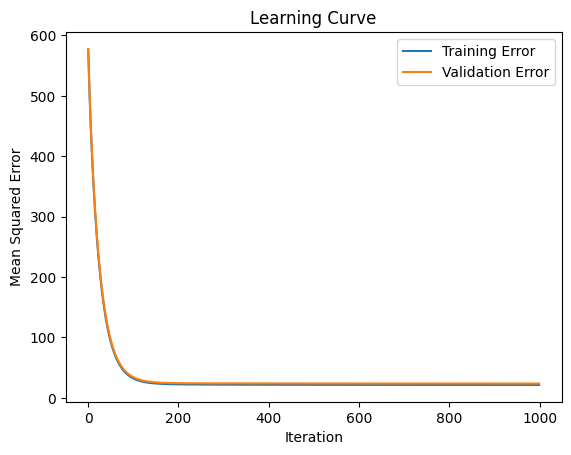

In [ ]:
# Function to plot the learning curve for Ridge Regression
def plot_learning_curve(X, y, learning_rate, reg_strength, max_iter):
    kf = KFold(n_splits=5)
    train_errors = []
    val_errors = []

    # Splitting the data into training and validation sets
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        model = RidgeRegression(learning_rate, reg_strength, max_iter)
        train_error_fold = []
        val_error_fold = []

        # Training the model and recording the errors for each iteration
        X_train_fold_intercept = model._add_intercept(X_train_fold)
        model.weights = np.zeros(X_train_fold_intercept.shape[1])
        for _ in range(max_iter):
            model.weights -= learning_rate * model._compute_gradient(X_train_fold_intercept, y_train_fold)
            y_pred_train = X_train_fold_intercept.dot(model.weights)
            y_pred_val = model.predict(X_val_fold)
            train_error_fold.append(mean_squared_error(y_train_fold, y_pred_train))
            val_error_fold.append(mean_squared_error(y_val_fold, y_pred_val))

        train_errors.append(train_error_fold)
        val_errors.append(val_error_fold)

    # Averaging the errors across the folds
    train_errors_mean = np.mean(train_errors, axis=0)
    val_errors_mean = np.mean(val_errors, axis=0)

    # Plotting the learning curve
    plt.plot(train_errors_mean, label="Training Error")
    plt.plot(val_errors_mean, label="Validation Error")
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Plotting the learning curve for the best Ridge Regression parameters with input normalization only
plot_learning_curve(X_train_boston_input_scaled, y_train_boston, *best_params_ridge_input_norm[:3])


### Comparison with Other Regression Models

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
    ('Custom Ridge', RidgeRegression(*best_params_ridge_input_norm)),
    ('Custom Kernel Ridge', KernelRidgeRegression(*best_params_kernel_input_norm)),
    ('Sklearn Ridge', Ridge(alpha=best_params_ridge_input_norm[1])),
    ('Sklearn Kernel Ridge', KernelRidge(alpha=best_params_kernel_input_norm[1], kernel=best_params_kernel_input_norm[0])),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR()),
    ('Random Forest', RandomForestRegressor())
]


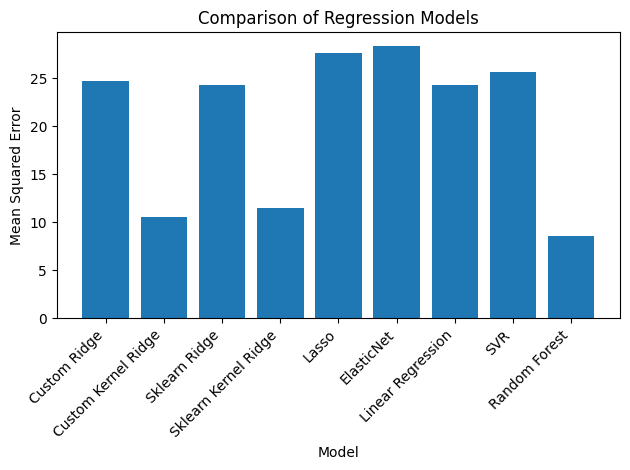

In [ ]:
mse_results = []
model_names = []

# Train models and compute MSE
for name, model in models:
    if name == 'Custom Kernel Ridge':
        model.fit(X_train_boston_input_scaled, y_train_boston)
        y_pred = model.predict(X_train_boston_input_scaled, X_test_boston_input_scaled)
    else:
        model.fit(X_train_boston_input_scaled, y_train_boston)
        y_pred = model.predict(X_test_boston_input_scaled)

    mse = mean_squared_error(y_test_boston, y_pred)
    mse_results.append(mse)
    model_names.append(name)

plt.bar(model_names, mse_results)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Create a dictionary with model names and corresponding MSE
results_dict = {'Model': model_names, 'Mean Squared Error': mse_results}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results_dict)

# Sort the results by MSE
results_df = results_df.sort_values(by='Mean Squared Error')

# Display the DataFrame
print(results_df)


                  Model  Mean Squared Error
8         Random Forest            8.590508
1   Custom Kernel Ridge           10.529729
3  Sklearn Kernel Ridge           11.517173
6     Linear Regression           24.291119
2         Sklearn Ridge           24.312904
0          Custom Ridge           24.692731
7                   SVR           25.668540
4                 Lasso           27.577692
5            ElasticNet           28.358648


In [ ]:
# Importing standard libraries
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Placeholder for custom implementations or specific algorithms
class CustomAlgorithm:
    def fit(self, X, y):
        # Training code
        pass

    def predict(self, X):
        # Prediction code
        return predictions

# List of models including custom Ridge and Kernel Ridge models
models = [
    ('Custom Ridge', RidgeRegression(*best_params_ridge_input_norm)),
    ('Custom Kernel Ridge', KernelRidgeRegression(*best_params_kernel_input_norm)),
    ('Sklearn Ridge', Ridge(alpha=best_params_ridge_input_norm[1])),
    ('Sklearn Kernel Ridge', KernelRidge(alpha=best_params_ridge_input_norm[1], kernel=best_params_kernel_input_norm[0])),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR()),
    ('Random Forest', RandomForestRegressor()),
    ('Neural Network', MLPRegressor()), # Example of a neural network
    #('Custom Algorithm', CustomAlgorithm()), # Placeholder for custom or specific algorithm
    # Add other models here
]

mse_results = []
model_names = []

# Train models and compute MSE
for name, model in models:
    if name == 'Custom Kernel Ridge':
        model.fit(X_train_boston_input_scaled, y_train_boston)
        y_pred = model.predict(X_train_boston_input_scaled, X_test_boston_input_scaled)
    else:
        model.fit(X_train_boston_input_scaled, y_train_boston)
        y_pred = model.predict(X_test_boston_input_scaled)

    mse = mean_squared_error(y_test_boston, y_pred)
    mse_results.append(mse)
    model_names.append(name)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


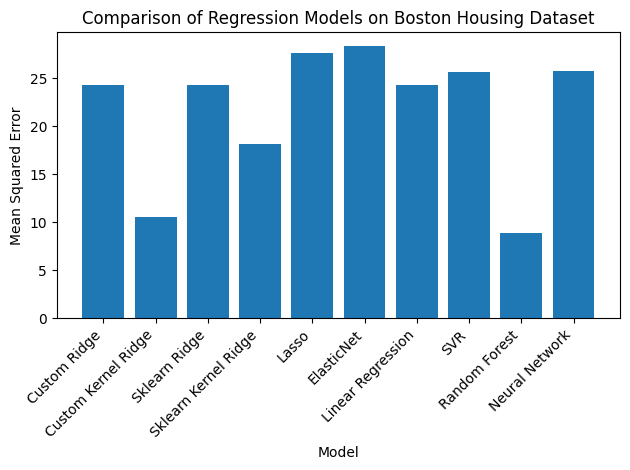

In [ ]:
# Plotting the comparison
plt.bar(model_names, mse_results)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models on Boston Housing Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Creating a DataFrame for tabular results
results_dict = {'Model': model_names, 'Mean Squared Error': mse_results}
results_df = pd.DataFrame(results_dict)
results_df = results_df.sort_values(by='Mean Squared Error')
print(results_df)


                  Model  Mean Squared Error
8         Random Forest            8.900499
1   Custom Kernel Ridge           10.529729
3  Sklearn Kernel Ridge           18.151197
6     Linear Regression           24.291119
2         Sklearn Ridge           24.312904
0          Custom Ridge           24.312904
7                   SVR           25.668540
9        Neural Network           25.801811
4                 Lasso           27.577692
5            ElasticNet           28.358648


### Ridge Regression for batch and online mode

In [ ]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, reg_strength=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.max_iter = max_iter
        self.weights = None

    def fit(self, X, y, mode='batch'):
        X = self._add_intercept(X)
        self.weights = np.zeros(X.shape[1])

        if mode == 'batch':
            for _ in range(self.max_iter):
                self.weights -= self.learning_rate * self._compute_gradient(X, y)
        elif mode == 'online':
            for i in range(self.max_iter):
                for xi, yi in zip(X, y):
                    self.weights -= self.learning_rate * self._compute_gradient(xi[np.newaxis, :], yi)
        else:
            raise ValueError("Invalid mode. Choose 'batch' or 'online'.")

    def predict(self, X):
        X = self._add_intercept(X)
        return X.dot(self.weights)

    def _add_intercept(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def _compute_gradient(self, X, y):
        predictions = X.dot(self.weights)
        errors = predictions - y
        reg_term = self.reg_strength * np.hstack([0, self.weights[1:]])
        return (2 / X.shape[0]) * (X.T.dot(errors) + reg_term)

In [ ]:
# Ridge Regression in Batch Mode
ridge_model_batch = RidgeRegression(*best_params_ridge_input_norm)
ridge_model_batch.fit(X_train_boston_input_scaled, y_train_boston, mode='batch')
mse_ridge_batch = mean_squared_error(y_test_boston, ridge_model_batch.predict(X_test_boston_input_scaled))

# Ridge Regression in Online Mode
ridge_model_online = RidgeRegression(*best_params_ridge_input_norm)
ridge_model_online.fit(X_train_boston_input_scaled, y_train_boston, mode='online')
mse_ridge_online = mean_squared_error(y_test_boston, ridge_model_online.predict(X_test_boston_input_scaled))


In [ ]:
print("Ridge Batch MSE:", mse_ridge_batch)
print("Ridge Online MSE:", mse_ridge_online)

Ridge Batch MSE: 24.31290383049163
Ridge Online MSE: 772.0474911071393
